# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
def weather_plot(plot_name, axis_x, axis_y, title, labelx, labely):
    fig, plot_name = plt.subplots(figsize=(8,5))
    fig.suptitle(title, fontsize='14')
    
    axis_xs = axis_x
    axis_xs_mean = axis_xs.mean()
    axis_ys = axis_y

    plot_name.scatter(axis_xs, axis_ys, color='steelblue', marker='o', edgecolors='black')
    plot_name.grid()
    plot_name.set_xlabel(labelx)
    plot_name.set_ylabel(labely)
    #plot_name.set_xlim([60,105])
    plot_name.legend(loc='best')
    
    plt.savefig('figures/' + str(title.replace(' ','_')) + '.png')
    return plt.show()

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
_api_city = []
_api_cloudiness = []
_api_country = []
_api_date = []
_api_humidity = []
_api_lat = []
_api_lng = []
_api_max_temp = []
_api_wind_speed = []
_api_cities_dict = {}

_open_weather_url = 'https://api.openweathermap.org/data/2.5/weather?'
print('Beginning Data Retrieval\n-----------------------------')
for i in cities:
    _query_url = _open_weather_url + 'q='+i+'&appid='+api_key
    _api_data = requests.get(_query_url).json()
    if(_api_data['cod'] == 200):
        print("Retrieving data from " + str(i))
        _api_city.append(i)
        _api_cloudiness.append(_api_data['clouds']['all'])
        _api_country.append(_api_data['sys']['country'])
        _api_date.append(_api_data['dt'])
        _api_humidity.append(_api_data['main']['humidity'])
        _api_lat.append(_api_data['coord']['lat'])
        _api_lng.append(_api_data['coord']['lon'])
        _api_max_temp.append(_api_data['main']['temp_max'])
        _api_wind_speed.append(_api_data['wind']['speed'])
    else:
        print(str(i) + ' not found. Skipping...' )


Beginning Data Retrieval
-----------------------------
Retrieving data from nanortalik
Retrieving data from atuona
Retrieving data from ushuaia
belushya guba not found. Skipping...
Retrieving data from saint george
Retrieving data from bereda
Retrieving data from hilo
Retrieving data from bluff
Retrieving data from naugachhia
Retrieving data from puerto ayora
Retrieving data from pevek
Retrieving data from hobart
Retrieving data from tuatapere
Retrieving data from new norfolk
yanan not found. Skipping...
Retrieving data from fallon
Retrieving data from bethel
Retrieving data from yellowknife
Retrieving data from saskylakh
Retrieving data from mackenzie
andarab not found. Skipping...
Retrieving data from mahebourg
Retrieving data from nome
utiroa not found. Skipping...
Retrieving data from rikitea
Retrieving data from banda aceh
Retrieving data from hermanus
Retrieving data from dong hoi
Retrieving data from punta arenas
Retrieving data from mataura
Retrieving data from kapaa
Retrieving

Retrieving data from narsaq
Retrieving data from imbituba
Retrieving data from nampula
Retrieving data from montepuez
kazalinsk not found. Skipping...
Retrieving data from terrace
olafsvik not found. Skipping...
cockburn harbour not found. Skipping...
Retrieving data from sao filipe
nizhneyansk not found. Skipping...
Retrieving data from matay
Retrieving data from ahipara
pemangkat not found. Skipping...
Retrieving data from yaring
Retrieving data from mount gambier
tsihombe not found. Skipping...
Retrieving data from mokhsogollokh
Retrieving data from farmington
Retrieving data from raudeberg
Retrieving data from harper
Retrieving data from tucupita
Retrieving data from tautira
Retrieving data from bodmin
tabiauea not found. Skipping...
Retrieving data from nuuk
Retrieving data from nemuro
Retrieving data from kyshtovka
Retrieving data from broken hill
Retrieving data from rio gallegos
Retrieving data from khandyga
saleaula not found. Skipping...
Retrieving data from nangomba
artyk no

Retrieving data from grand island
Retrieving data from petropavlovsk-kamchatskiy
Retrieving data from wahpeton
Retrieving data from saint-augustin
Retrieving data from steamboat springs
Retrieving data from madhogarh
Retrieving data from westport
Retrieving data from los llanos de aridane
Retrieving data from warrnambool
Retrieving data from homer
Retrieving data from mariel
cumaribo not found. Skipping...
bengkulu not found. Skipping...
Retrieving data from pando
Retrieving data from aurora
Retrieving data from praia
Retrieving data from ajdabiya
Retrieving data from satuk
Retrieving data from praya
Retrieving data from kaeo
Retrieving data from praia da vitoria
Retrieving data from kattivakkam
Retrieving data from jepelacio
marcona not found. Skipping...
Retrieving data from sosva
cam pha not found. Skipping...
torit not found. Skipping...
Retrieving data from skjervoy
Retrieving data from semey
Retrieving data from aswan
Retrieving data from manoharpur
Retrieving data from puerto ma

In [5]:
_api_cities_dict = list(zip(_api_city, _api_cloudiness, _api_country, _api_date, _api_humidity, _api_lat, _api_lng, _api_max_temp,_api_wind_speed))

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
_openweather_info_df = pd.DataFrame(_api_cities_dict,
                                   columns=['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed'])

In [7]:
_openweather_info_df.to_csv(output_data_file)
_openweather_info_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,nanortalik,8,GL,1563037940,78,60.14,-45.24,280.70,3.92
1,atuona,7,PF,1563037941,73,-9.80,-139.03,300.30,7.73
2,ushuaia,75,AR,1563037483,56,-54.81,-68.31,280.15,3.60
3,saint george,20,GR,1563037675,54,39.45,22.34,301.15,5.70
4,bereda,40,ES,1563037942,83,43.27,-7.54,295.15,5.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

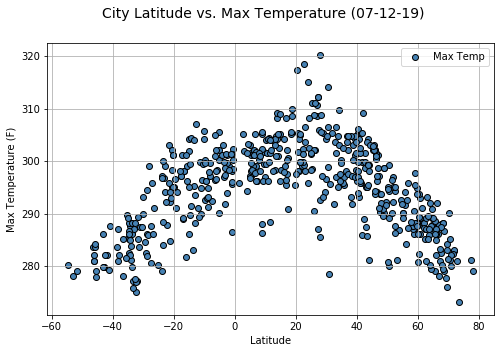

In [8]:
weather_plot('lat_vs_temperature', 
             _openweather_info_df['Lat'], 
             _openweather_info_df['Max Temp'], 
             'City Latitude vs. Max Temperature (07-12-19)', 
             'Latitude', 
             'Max Temperature (F)')

#### Latitude vs. Humidity Plot

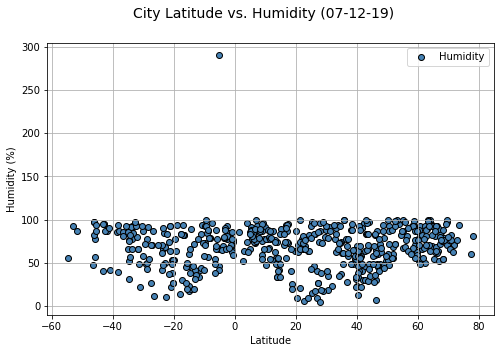

In [9]:
weather_plot('lat_vs_humidity', 
             _openweather_info_df['Lat'], 
             _openweather_info_df['Humidity'], 
             'City Latitude vs. Humidity (07-12-19)', 
             'Latitude', 
             'Humidity (%)')

#### Latitude vs. Cloudiness Plot

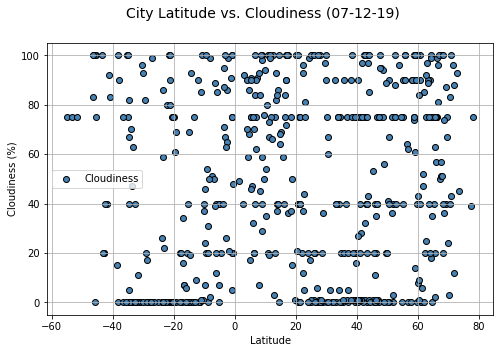

In [10]:
weather_plot('lat_vs_cloudiness', 
             _openweather_info_df['Lat'], 
             _openweather_info_df['Cloudiness'], 
             'City Latitude vs. Cloudiness (07-12-19)', 
             'Latitude', 
             'Cloudiness (%)')

#### Latitude vs. Wind Speed Plot

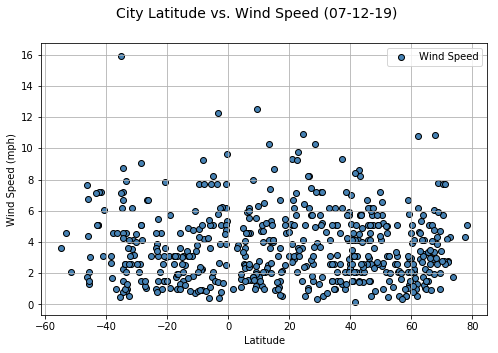

In [11]:
weather_plot('lat_vs_wind_speed', 
             _openweather_info_df['Lat'], 
             _openweather_info_df['Wind Speed'], 
             'City Latitude vs. Wind Speed (07-12-19)', 
             'Latitude', 
             'Wind Speed (mph)')